<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Number_Recognition_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importing the packages



In [3]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [4]:
train_file = "https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/DL-nums.csv"
test_file = "https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/test.csv"

In [5]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

Text(0.5, 1.0, '28x28 data')

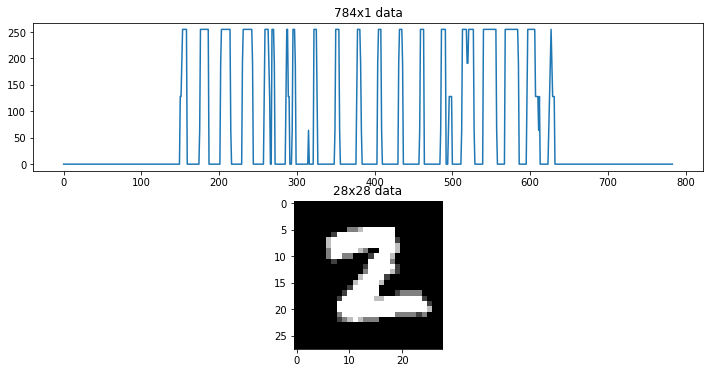

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [8]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [9]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [11]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [14]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, 
                           verbose=2,  
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 - 27s - loss: 0.8228 - accuracy: 0.7454 - val_loss: 0.2152 - val_accuracy: 0.9300
Epoch 2/20
500/500 - 25s - loss: 0.3211 - accuracy: 0.9040 - val_loss: 0.0782 - val_accuracy: 0.9775
Epoch 3/20
500/500 - 25s - loss: 0.2318 - accuracy: 0.9321 - val_loss: 0.0274 - val_accuracy: 0.9900
Epoch 4/20
500/500 - 26s - loss: 0.1936 - accuracy: 0.9409 - val_loss: 0.0535 - val_accuracy: 0.9850
Epoch 5/20
500/500 - 26s - loss: 0.1975 - accuracy: 0.9439 - val_loss: 0.0323 - val_accuracy: 0.9900
Epoch 6/20
500/500 - 25s - loss: 0.1500 - accuracy: 0.9555 - val_loss: 0.0277 - val_accuracy: 0.9925
Epoch 7/20
500/500 - 25s - loss: 0.1497 - accuracy: 0.9572 - val_loss: 0.0199 - val_accuracy: 0.9950
Epoch 8/20
500/500 - 25s - loss: 0.1218 - accuracy: 0.9661 - val_loss: 0.0353 - val_accuracy: 0.9875
Epoch 9/20
500/500 - 25s - loss: 0.1149 - accuracy: 0.9656 - val_loss: 0.0268 - val_accuracy: 0.9900
Epoch 10/20
500/500 - 25s - loss: 0.1125 - accuracy: 0.9675 - val_loss: 0.0150 - val_accura

In [15]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0203, final accuracy: 0.9938


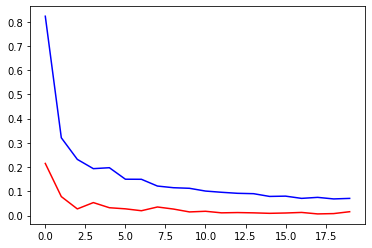

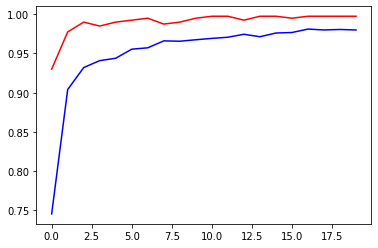

In [19]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['accuracy'], color='b')
plt.plot(hist.history['val_accuracy'], color='r')
plt.show()

In [17]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[404   0   0   0   0   0   1   0   3   0]
 [  0 463   0   0   0   1   0   1   0   0]
 [  0   0 379   1   0   0   0   1   1   0]
 [  0   0   0 431   0   0   0   0   0   0]
 [  0   0   0   0 434   0   0   1   0   0]
 [  0   0   0   0   0 393   0   0   1   0]
 [  0   0   0   0   0   0 405   0   0   0]
 [  0   3   2   0   2   0   0 451   0   1]
 [  0   0   0   0   0   0   0   0 406   0]
 [  0   0   0   0   3   0   0   1   3 408]]


In [20]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.
y_hat = model.predict(x_test, batch_size=64)